# Analysis of Flags Dataset and Decision Tree Classification

__Summary:__

In this Jupyter Notebook project, we conducted a comprehensive analysis of a dataset containing information about flags of various countries. The project involved data preprocessing, exploratory data analysis, and the application of machine learning techniques, particularly decision tree classification.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

In [22]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

Some of the input and output features of interest are:

* name: Name of the country concerned
* landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
* bars: Number of vertical bars in the flag
* stripes: Number of horizontal stripes in the flag
* colours: Number of different colours in the flag
* red: 0 if red absent, 1 if red present in the flag
* mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
* circles: Number of circles in the flag
* crosses: Number of (upright) crosses
* saltires: Number of diagonal crosses
* quarters: Number of quartered sections
* sunstars: Number of sun or star symbols

In [23]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [25]:
df['landmass'].value_counts()

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

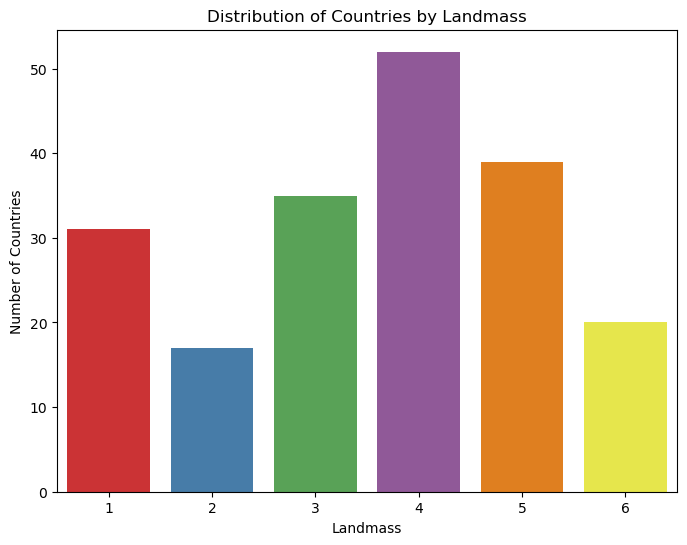

In [45]:
# Create a bar plot to show the distribution of countries by landmass
plt.figure(figsize=(8, 6))
sns.countplot(x='landmass', data=df, palette='Set1')
plt.xlabel('Landmass')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by Landmass')
plt.show()

In [26]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df["landmass"].isin([3,6])]

In [27]:
df_36.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red


In [28]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [29]:
#Print the average vales of the predictors for Europe and Oceania
print(df_36.groupby('landmass')[var].mean().T)

landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6588\925714240.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_colors = df_36[var].mean(axis=0)  # Use axis=0 to calculate the mean column-wise


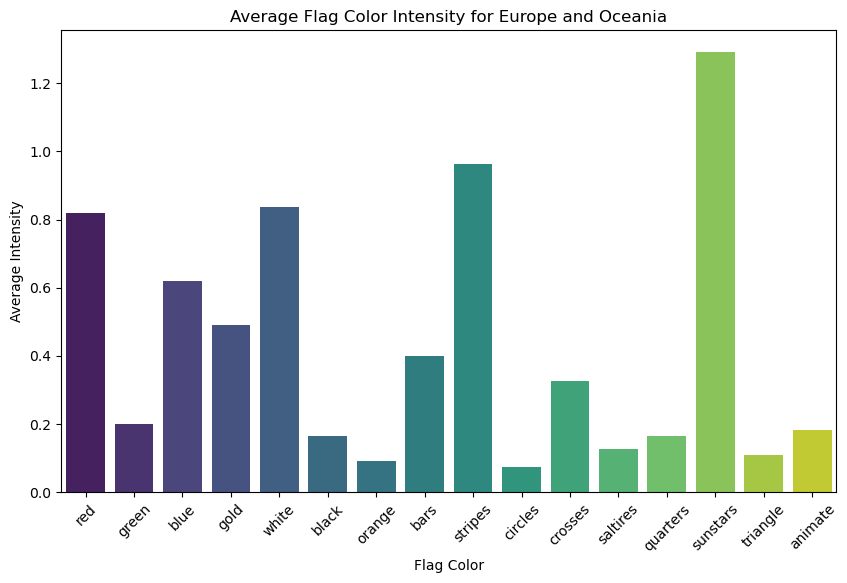

In [47]:
# Create a bar plot to visualize the average flag color intensity for Europe and Oceania
avg_colors = df_36[var].mean(axis=0)  # Use axis=0 to calculate the mean column-wise
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_colors.index, y=avg_colors.values, palette='viridis')
plt.xlabel('Flag Color')
plt.ylabel('Average Intensity')
plt.title('Average Flag Color Intensity for Europe and Oceania')
plt.xticks(rotation=45)
plt.show()

In [32]:
#Create labels for only Europe and Oceania
df_36 = df[df["landmass"].isin([3,6])]
labels = df_36["landmass"]

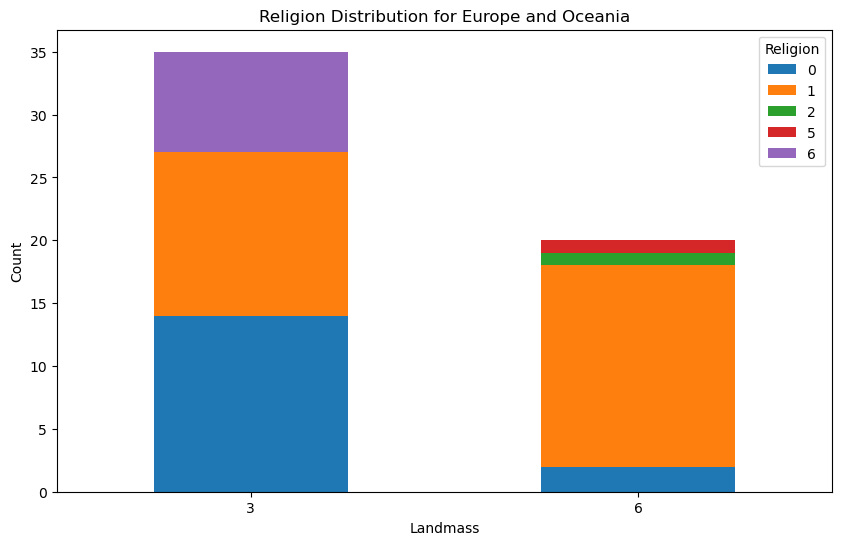

In [52]:
# Create a stacked bar plot to visualize the distribution of religions in Europe and Oceania
religion_distribution = df_36.groupby(['landmass', 'religion']).size().unstack()
religion_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Landmass')
plt.ylabel('Count')
plt.title('Religion Distribution for Europe and Oceania')
plt.xticks(rotation=0)
plt.legend(title='Religion', loc='upper right')
plt.show()

In [33]:
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

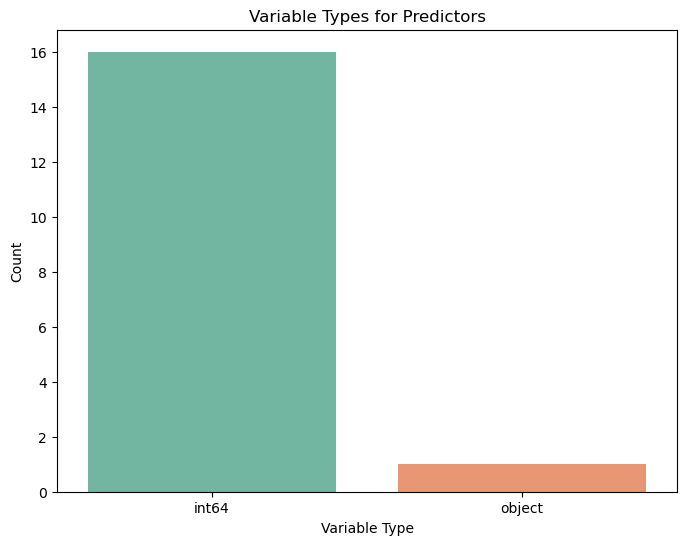

In [48]:
# Create a bar plot to show the variable types for the predictors
var_types = df[var].dtypes
plt.figure(figsize=(8, 6))
sns.countplot(x=var_types, palette='Set2')
plt.xlabel('Variable Type')
plt.ylabel('Count')
plt.title('Variable Types for Predictors')
plt.show()

In [34]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)

In [36]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

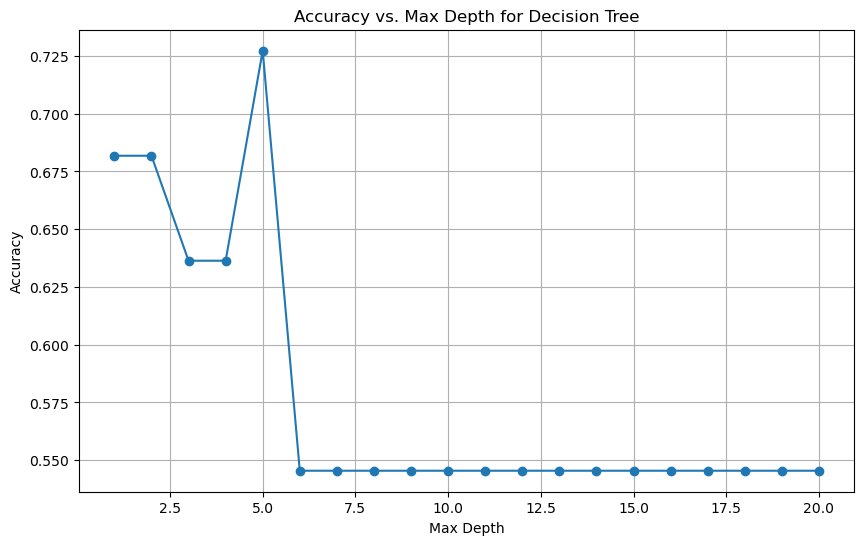

In [50]:
# Create a line plot to visualize accuracy vs. max depth for the decision tree
plt.figure(figsize=(10, 6))
plt.plot(depths, acc_depth, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth for Decision Tree')
plt.grid(True)
plt.show()

In [38]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 72.7% at depth 5


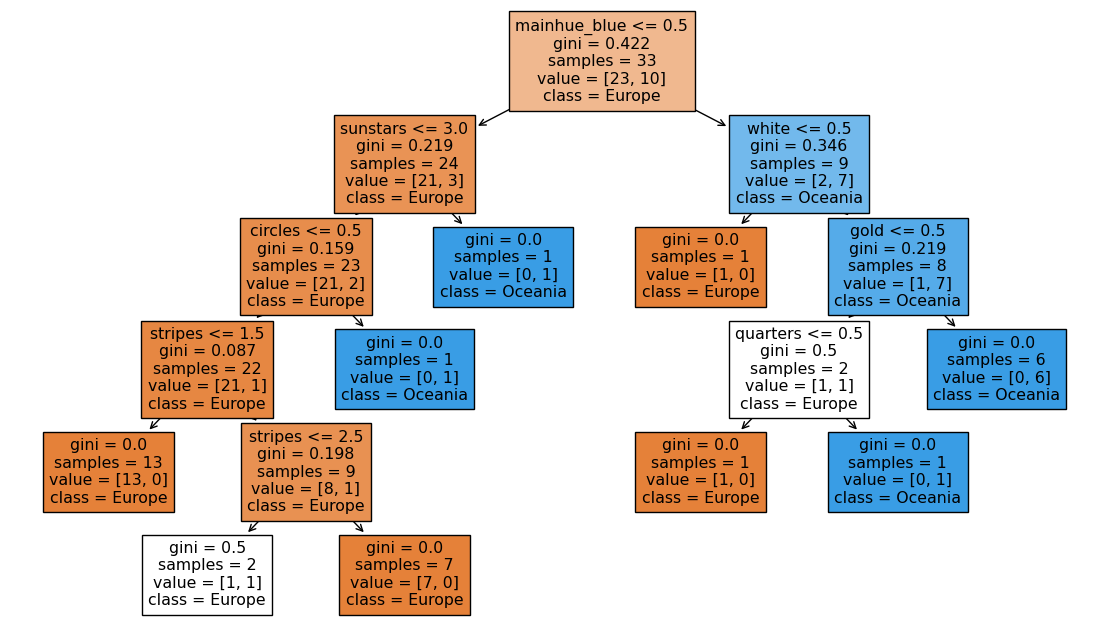

In [39]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()

In [40]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

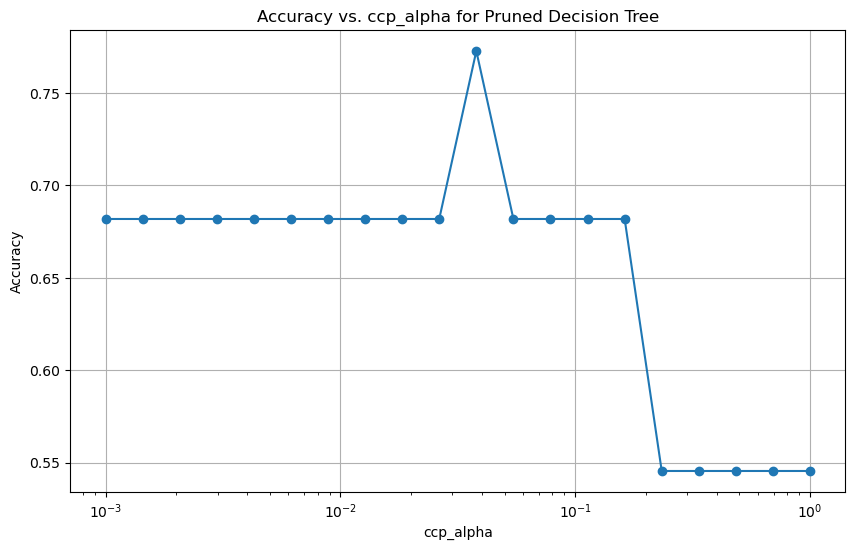

In [51]:
# Create a line plot to visualize accuracy vs. ccp_alpha for pruned decision tree
plt.figure(figsize=(10, 6))
plt.plot(ccp, acc_pruned, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha for Pruned Decision Tree')
plt.grid(True)
plt.show()

In [42]:
# Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 77.3% at ccp_alpha 0.0379


In [43]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0379269019073225, max_depth=5,
                       random_state=1)

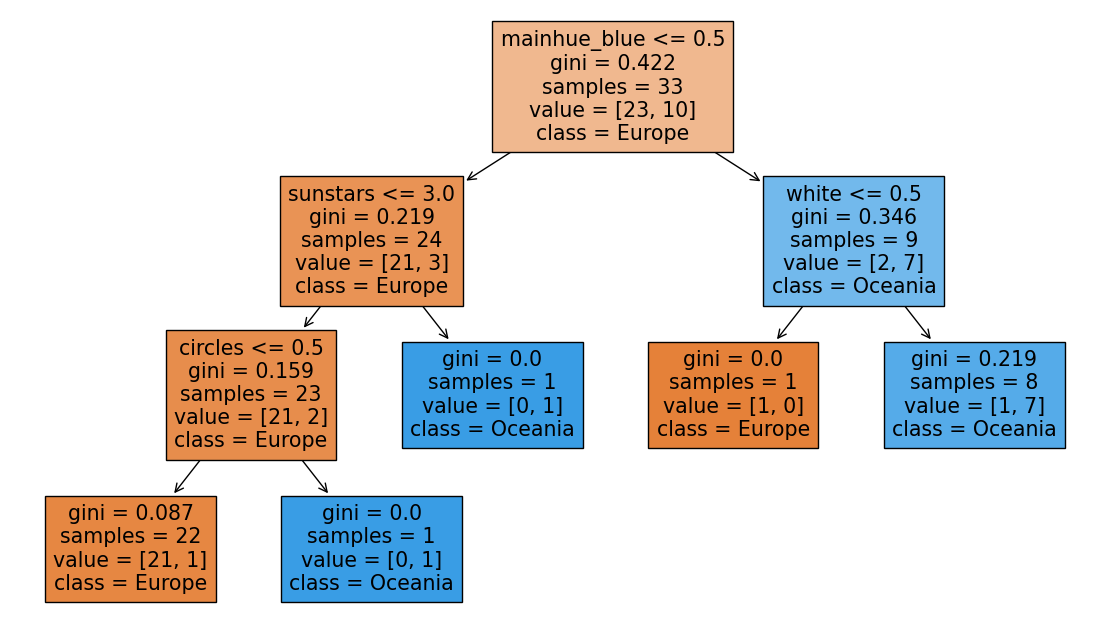

In [44]:
#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()